In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\Train.csv")
test = pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\Test.csv")
meal = pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\meal_info.csv")
center = pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\fulfilment_center_info.csv")

In [3]:
print(train.shape)
train.head()

(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
print(test.shape)
test.head()

(32573, 8)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [7]:
print(meal.shape)
meal.head()

(51, 3)


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
print(center.shape)
center.head()

(77, 5)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [11]:
train = pd.merge(train,center, on='center_id')
test = pd.merge(test,center, on='center_id')

train = pd.merge(train,meal, on='meal_id')
test = pd.merge(test,meal, on='meal_id')

In [12]:
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(456548, 15) (32573, 14) (489121, 15)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 15 columns):
base_price               489121 non-null float64
category                 489121 non-null object
center_id                489121 non-null int64
center_type              489121 non-null object
checkout_price           489121 non-null float64
city_code                489121 non-null int64
cuisine                  489121 non-null object
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
id                       489121 non-null int64
meal_id                  489121 non-null int64
num_orders               456548 non-null float64
op_area                  489121 non-null float64
region_code              489121 non-null int64
week                     489121 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 56.0+ MB


In [14]:
df.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,Beverages,55,TYPE_C,136.83,647,Thai,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,Beverages,55,TYPE_C,135.83,647,Thai,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,Beverages,55,TYPE_C,132.92,647,Thai,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,Beverages,55,TYPE_C,135.86,647,Thai,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,Beverages,55,TYPE_C,146.50,647,Thai,0,0,1343872,1885,215.0,2.0,56,5


In [15]:
df.describe()

,base_price,center_id,checkout_price,city_code,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
count,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,4.891210e+05,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000
mean,354.312259,82.092206,332.879277,601.551172,0.080172,0.107346,1.249988e+06,2024.852268,261.872760,4.083865,56.621065,79.810613
std,160.352168,45.973390,153.022073,66.182598,0.271560,0.309552,1.443421e+05,547.408978,395.922798,1.092163,17.641296,44.343325
min,55.350000,10.000000,2.970000,456.000000,0.000000,0.000000,1.000000e+06,1062.000000,13.000000,0.900000,23.000000,1.000000
25%,243.500000,43.000000,228.010000,553.000000,0.000000,0.000000,1.124937e+06,1558.000000,54.000000,3.600000,34.000000,42.000000
50%,311.430000,76.000000,299.760000,596.000000,0.000000,0.000000,1.249977e+06,1993.000000,136.000000,4.000000,56.000000,81.000000
75%,458.810000,110.000000,445.230000,651.000000,0.000000,0.000000,1.374988e+06,2539.000000,324.000000,4.500000,77.000000,118.000000
max,1112.620000,186.000000,1113.620000,713.000000,1.000000,1.000000,1.499999e+06,2956.000000,24299.000000,7.000000,93.000000,155.000000


In [16]:
df.columns

Index(['base_price', 'category', 'center_id', 'center_type', 'checkout_price',
       'city_code', 'cuisine', 'emailer_for_promotion', 'homepage_featured',
       'id', 'meal_id', 'num_orders', 'op_area', 'region_code', 'week'],
      dtype='object')

In [17]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['center_id', 'city_code', 'emailer_for_promotion', 'homepage_featured',
        'id', 'meal_id', 'region_code', 'week'],
       dtype='object'),
 dtype('float64'): Index(['base_price', 'checkout_price', 'num_orders', 'op_area'], dtype='object'),
 dtype('O'): Index(['category', 'center_type', 'cuisine'], dtype='object')}

In [18]:
df.isnull().sum()

base_price                   0
category                     0
center_id                    0
center_type                  0
checkout_price               0
city_code                    0
cuisine                      0
emailer_for_promotion        0
homepage_featured            0
id                           0
meal_id                      0
num_orders               32573
op_area                      0
region_code                  0
week                         0
dtype: int64

In [19]:
df.apply(lambda x: x.dtype)

base_price               object
category                 object
center_id                object
center_type              object
checkout_price           object
city_code                object
cuisine                  object
emailer_for_promotion    object
homepage_featured        object
id                       object
meal_id                  object
num_orders               object
op_area                  object
region_code              object
week                     object
dtype: object

In [20]:
df.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,Beverages,55,TYPE_C,136.83,647,Thai,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,Beverages,55,TYPE_C,135.83,647,Thai,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,Beverages,55,TYPE_C,132.92,647,Thai,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,Beverages,55,TYPE_C,135.86,647,Thai,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,Beverages,55,TYPE_C,146.50,647,Thai,0,0,1343872,1885,215.0,2.0,56,5


In [21]:
df.homepage_featured.unique()

array([0, 1], dtype=int64)

In [22]:
print(df.groupby('homepage_featured').size())

homepage_featured
0    436616
1     52505
dtype: int64


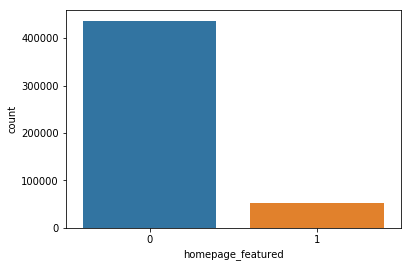

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['homepage_featured'],label="Count")
plt.show()

In [24]:
df.emailer_for_promotion.unique()

array([0, 1], dtype=int64)

In [25]:
print(df.groupby('emailer_for_promotion').size())

emailer_for_promotion
0    449907
1     39214
dtype: int64


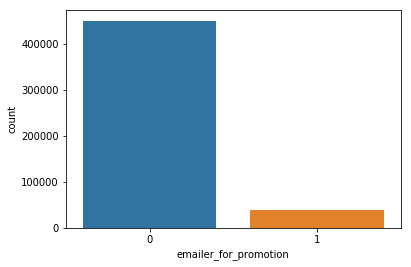

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['emailer_for_promotion'],label="Count")
plt.show()

In [27]:
df.category.unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [28]:
print(df.groupby('category').size())

category
Beverages       136781
Biryani          21951
Desert           31407
Extras           14554
Fish             11518
Other Snacks     31483
Pasta            29621
Pizza            35444
Rice Bowl        35717
Salad            30868
Sandwich         35599
Seafood          28613
Soup             13640
Starters         31925
dtype: int64


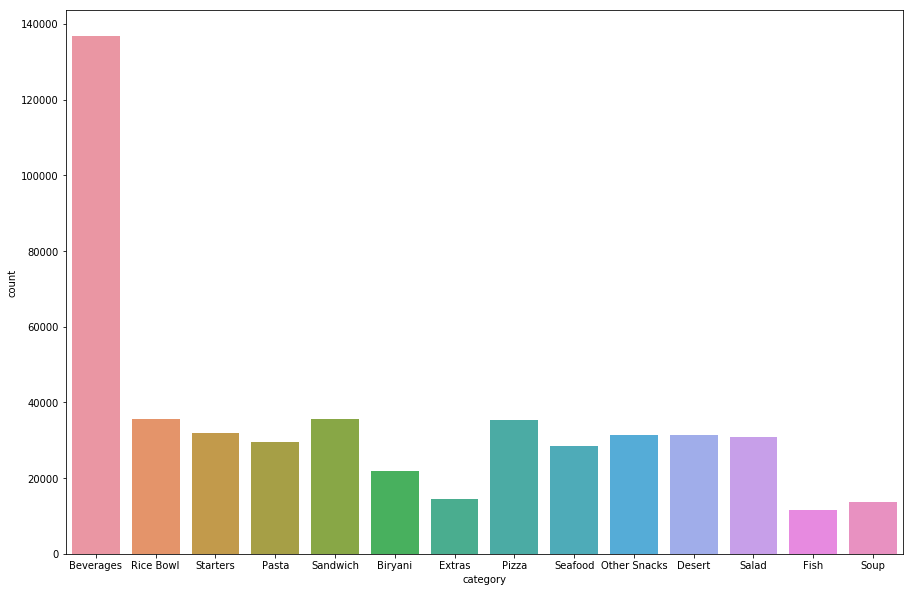

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.countplot(df['category'],label="Count")
plt.show()

In [30]:
df['category'] = df['category'].map({'Beverages':0, 'Rice Bowl':1, 'Starters':2, 'Pasta':3, 'Sandwich':4,
       'Biryani':5, 'Extras':6, 'Pizza':7, 'Seafood':8, 'Other Snacks':9, 'Desert':10,
       'Salad':11, 'Fish':12, 'Soup':13})
df.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,0,55,TYPE_C,136.83,647,Thai,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,0,55,TYPE_C,135.83,647,Thai,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,0,55,TYPE_C,132.92,647,Thai,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,0,55,TYPE_C,135.86,647,Thai,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,0,55,TYPE_C,146.50,647,Thai,0,0,1343872,1885,215.0,2.0,56,5


In [31]:
df.center_type.unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [32]:
print(df.groupby('center_type').size())

center_type
TYPE_A    281597
TYPE_B    100922
TYPE_C    106602
dtype: int64


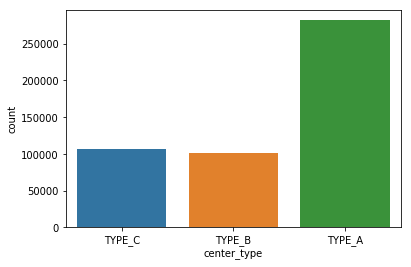

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['center_type'],label="Count")
plt.show()

In [34]:
df['center_type'] = df['center_type'].map({'TYPE_A':0, 'TYPE_B':1, 'TYPE_C':2})
df.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,0,55,2,136.83,647,Thai,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,0,55,2,135.83,647,Thai,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,0,55,2,132.92,647,Thai,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,0,55,2,135.86,647,Thai,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,0,55,2,146.50,647,Thai,0,0,1343872,1885,215.0,2.0,56,5


In [35]:
df.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [36]:
print(df.groupby('cuisine').size())

cuisine
Continental    110383
Indian         120419
Italian        131761
Thai           126558
dtype: int64


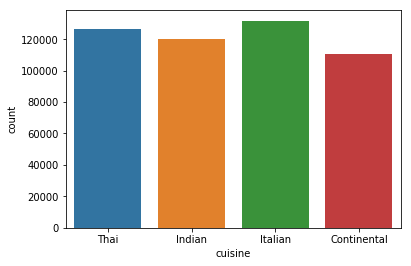

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['cuisine'],label="Count")
plt.show()

In [38]:
df['cuisine'] = df['cuisine'].map({'Thai':0, 'Indian':1, 'Italian':2, 'Continental':3})
df.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,0,55,2,136.83,647,0,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,0,55,2,135.83,647,0,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,0,55,2,132.92,647,0,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,0,55,2,135.86,647,0,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,0,55,2,146.50,647,0,0,0,1343872,1885,215.0,2.0,56,5


In [39]:
df.emailer_for_promotion.value_counts()

0    449907
1     39214
Name: emailer_for_promotion, dtype: int64

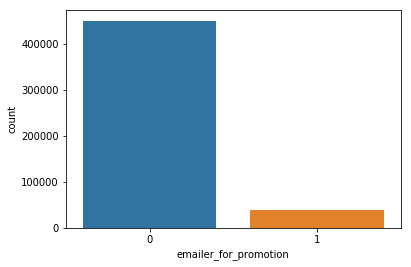

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['emailer_for_promotion'],label="Count")
plt.show()

In [41]:
df.homepage_featured.value_counts()

0    436616
1     52505
Name: homepage_featured, dtype: int64

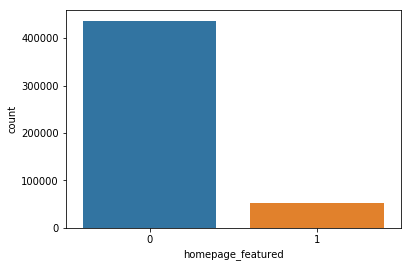

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['homepage_featured'],label="Count")
plt.show()

In [43]:
data = pd.get_dummies(df)
data.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,0,55,2,136.83,647,0,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,0,55,2,135.83,647,0,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,0,55,2,132.92,647,0,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,0,55,2,135.86,647,0,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,0,55,2,146.50,647,0,0,0,1343872,1885,215.0,2.0,56,5


In [44]:
data.dropna(inplace = True)
data.isnull().sum()

base_price               0
category                 0
center_id                0
center_type              0
checkout_price           0
city_code                0
cuisine                  0
emailer_for_promotion    0
homepage_featured        0
id                       0
meal_id                  0
num_orders               0
op_area                  0
region_code              0
week                     0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
base_price               456548 non-null float64
category                 456548 non-null int64
center_id                456548 non-null int64
center_type              456548 non-null int64
checkout_price           456548 non-null float64
city_code                456548 non-null int64
cuisine                  456548 non-null int64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
id                       456548 non-null int64
meal_id                  456548 non-null int64
num_orders               456548 non-null float64
op_area                  456548 non-null float64
region_code              456548 non-null int64
week                     456548 non-null int64
dtypes: float64(4), int64(11)
memory usage: 55.7 MB


In [46]:
data.dtypes

base_price               float64
category                   int64
center_id                  int64
center_type                int64
checkout_price           float64
city_code                  int64
cuisine                    int64
emailer_for_promotion      int64
homepage_featured          int64
id                         int64
meal_id                    int64
num_orders               float64
op_area                  float64
region_code                int64
week                       int64
dtype: object

In [48]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['category', 'center_id', 'center_type', 'city_code', 'cuisine',
        'emailer_for_promotion', 'homepage_featured', 'id', 'meal_id',
        'region_code', 'week'],
       dtype='object'),
 dtype('float64'): Index(['base_price', 'checkout_price', 'num_orders', 'op_area'], dtype='object')}

In [49]:
data.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,152.29,0,55,2,136.83,647,0,0,0,1379560,1885,177.0,2.0,56,1
1,152.29,0,55,2,135.83,647,0,0,0,1018704,1885,323.0,2.0,56,2
2,133.92,0,55,2,132.92,647,0,0,0,1196273,1885,96.0,2.0,56,3
3,134.86,0,55,2,135.86,647,0,0,0,1116527,1885,163.0,2.0,56,4
4,147.50,0,55,2,146.50,647,0,0,0,1343872,1885,215.0,2.0,56,5


In [50]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
base_price,0.0
category,0.0
center_id,0.0
center_type,0.0
checkout_price,0.0
city_code,0.0
cuisine,0.0
emailer_for_promotion,0.0
homepage_featured,0.0
id,0.0


In [51]:
data.describe()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,354.156627,4.599278,82.105796,0.642342,332.238933,601.553399,1.460628,0.081152,0.10920,1.250096e+06,2024.337458,261.872760,4.083590,56.614566,74.768771
std,160.715914,4.186359,45.975046,0.816105,152.939723,66.195914,1.103012,0.273069,0.31189,1.443548e+05,547.420920,395.922798,1.091686,17.641306,41.524956
min,55.350000,0.000000,10.000000,0.000000,2.970000,456.000000,0.000000,0.000000,0.00000,1.000000e+06,1062.000000,13.000000,0.900000,23.000000,1.000000
25%,243.500000,0.000000,43.000000,0.000000,228.950000,553.000000,0.000000,0.000000,0.00000,1.124999e+06,1558.000000,54.000000,3.600000,34.000000,39.000000
50%,310.460000,4.000000,76.000000,0.000000,296.820000,596.000000,1.000000,0.000000,0.00000,1.250184e+06,1993.000000,136.000000,4.000000,56.000000,76.000000
75%,458.870000,8.000000,110.000000,1.000000,445.230000,651.000000,2.000000,0.000000,0.00000,1.375140e+06,2539.000000,324.000000,4.500000,77.000000,111.000000
max,866.270000,13.000000,186.000000,2.000000,866.270000,713.000000,3.000000,1.000000,1.00000,1.499999e+06,2956.000000,24299.000000,7.000000,93.000000,145.000000


In [52]:
data.shape

(456548, 15)

In [74]:
df.shape

(489121, 15)

In [75]:
df.describe()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
count,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,4.891210e+05,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000
mean,354.312259,4.615255,82.092206,0.642226,332.879277,601.551172,1.461990,0.080172,0.107346,1.249988e+06,2024.852268,261.872760,4.083865,56.621065,79.810613
std,160.352168,4.195925,45.973390,0.815883,153.022073,66.182598,1.103359,0.271560,0.309552,1.443421e+05,547.408978,395.922798,1.092163,17.641296,44.343325
min,55.350000,0.000000,10.000000,0.000000,2.970000,456.000000,0.000000,0.000000,0.000000,1.000000e+06,1062.000000,13.000000,0.900000,23.000000,1.000000
25%,243.500000,0.000000,43.000000,0.000000,228.010000,553.000000,0.000000,0.000000,0.000000,1.124937e+06,1558.000000,54.000000,3.600000,34.000000,42.000000
50%,311.430000,4.000000,76.000000,0.000000,299.760000,596.000000,1.000000,0.000000,0.000000,1.249977e+06,1993.000000,136.000000,4.000000,56.000000,81.000000
75%,458.810000,8.000000,110.000000,1.000000,445.230000,651.000000,2.000000,0.000000,0.000000,1.374988e+06,2539.000000,324.000000,4.500000,77.000000,118.000000
max,1112.620000,13.000000,186.000000,2.000000,1113.620000,713.000000,3.000000,1.000000,1.000000,1.499999e+06,2956.000000,24299.000000,7.000000,93.000000,155.000000


In [53]:
data.columns

Index(['base_price', 'category', 'center_id', 'center_type', 'checkout_price',
       'city_code', 'cuisine', 'emailer_for_promotion', 'homepage_featured',
       'id', 'meal_id', 'num_orders', 'op_area', 'region_code', 'week'],
      dtype='object')

In [54]:
data.index.values

array([     0,      1,      2, ..., 456545, 456546, 456547], dtype=int64)

In [55]:
data.apply(lambda x: len(x.unique()))

base_price                 1907
category                     14
center_id                    77
center_type                   3
checkout_price             1992
city_code                    51
cuisine                       4
emailer_for_promotion         2
homepage_featured             2
id                       456548
meal_id                      51
num_orders                 1250
op_area                      30
region_code                   8
week                        145
dtype: int64

In [56]:
from missingpy import KNNImputer

In [57]:
#Creating the imputation object
imputer = KNNImputer(missing_values = "NaN", metric = "masked_euclidean", n_neighbors = 3)
new_data = imputer.fit_transform(df[['num_orders']])
new_data

array([[177.        ],
       [323.        ],
       [ 96.        ],
       ...,
       [261.87276037],
       [261.87276037],
       [261.87276037]])

# Measures of Variability

In [58]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

base_price                  215.37
category                      8.00
center_id                    67.00
center_type                   1.00
checkout_price              216.28
city_code                    98.00
cuisine                       2.00
emailer_for_promotion         0.00
homepage_featured             0.00
id                       250141.50
meal_id                     981.00
num_orders                  270.00
op_area                       0.90
region_code                  43.00
week                         72.00
dtype: float64


# Z-Score

In [59]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[1.25604767 1.09863549 0.58957691 ... 1.90859952 0.03483682 1.77649439]
 [1.25604767 1.09863549 0.58957691 ... 1.90859952 0.03483682 1.75241246]
 [1.37034885 1.09863549 0.58957691 ... 1.90859952 0.03483682 1.72833053]
 ...
 [1.41164378 1.76782027 0.45907119 ... 0.38143789 1.15555258 1.64313968]
 [1.41164378 1.76782027 0.45907119 ... 0.38143789 1.15555258 1.66722161]
 [1.41786595 1.76782027 0.45907119 ... 0.38143789 1.15555258 1.69130354]]


In [60]:
threshold = 3
print(np.where(z > 3))

(array([    51,     52,    145, ..., 456160, 456449, 456450], dtype=int64), array([ 7,  7, 11, ...,  7,  7,  7], dtype=int64))


In [61]:
print(z[51][1])

1.0986354854730171


# Standard Deviation

In [62]:
print(data.std())

base_price                  160.715914
category                      4.186359
center_id                    45.975046
center_type                   0.816105
checkout_price              152.939723
city_code                    66.195914
cuisine                       1.103012
emailer_for_promotion         0.273069
homepage_featured             0.311890
id                       144354.822378
meal_id                     547.420920
num_orders                  395.922798
op_area                       1.091686
region_code                  17.641306
week                         41.524956
dtype: float64


In [63]:
data_idx = data.set_index('week')
sumbyweek = data_idx['num_orders'].groupby(level=0).sum()
maxbyweek = data_idx['num_orders'].groupby(level=0).max()

In [64]:
data_idx.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code
week,,,,,,,,,,,,,,
1,152.29,0,55,2,136.83,647,0,0,0,1379560,1885,177.0,2.0,56
2,152.29,0,55,2,135.83,647,0,0,0,1018704,1885,323.0,2.0,56
3,133.92,0,55,2,132.92,647,0,0,0,1196273,1885,96.0,2.0,56
4,134.86,0,55,2,135.86,647,0,0,0,1116527,1885,163.0,2.0,56
5,147.50,0,55,2,146.50,647,0,0,0,1343872,1885,215.0,2.0,56


In [65]:
sumbyweek.head()

week
1     792261.0
2     787084.0
3     695262.0
4     743529.0
5    1198675.0
Name: num_orders, dtype: float64

In [66]:
maxbyweek.head()

week
1     3511.0
2     2606.0
3     2526.0
4     3172.0
5    24299.0
Name: num_orders, dtype: float64

In [67]:
num_orders_week_agg = pd.DataFrame({'Num_orders_Sum_by_Week': sumbyweek, 'Num_orders_Max_by_Week': maxbyweek})
num_orders_week_agg.head()

,Num_orders_Sum_by_Week,Num_orders_Max_by_Week
week,,
1,792261.0,3511.0
2,787084.0,2606.0
3,695262.0,2526.0
4,743529.0,3172.0
5,1198675.0,24299.0


In [68]:
num_orders_week_agg.sort_values(by='Num_orders_Max_by_Week',ascending=False).head()

,Num_orders_Sum_by_Week,Num_orders_Max_by_Week
week,,
5,1198675.0,24299.0
7,934803.0,15336.0
6,947288.0,14229.0
132,939374.0,13150.0
32,1034202.0,12327.0


# Box Plot

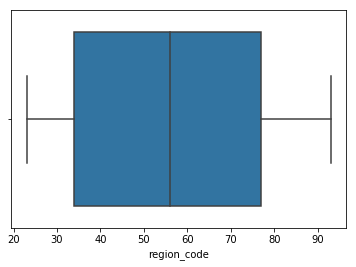

In [69]:
import seaborn as sns
sns.boxplot(x=data['region_code'])

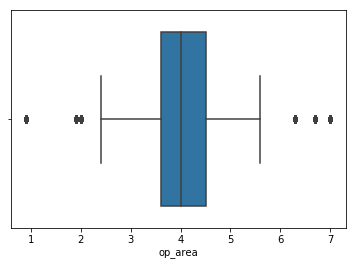

In [70]:
import seaborn as sns
sns.boxplot(x=data['op_area'])

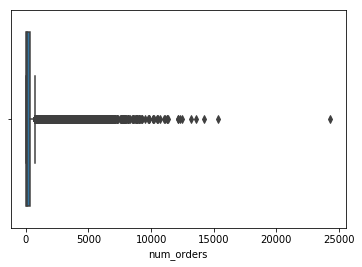

In [71]:
import seaborn as sns
sns.boxplot(x=data['num_orders'])

# Histogram Plot

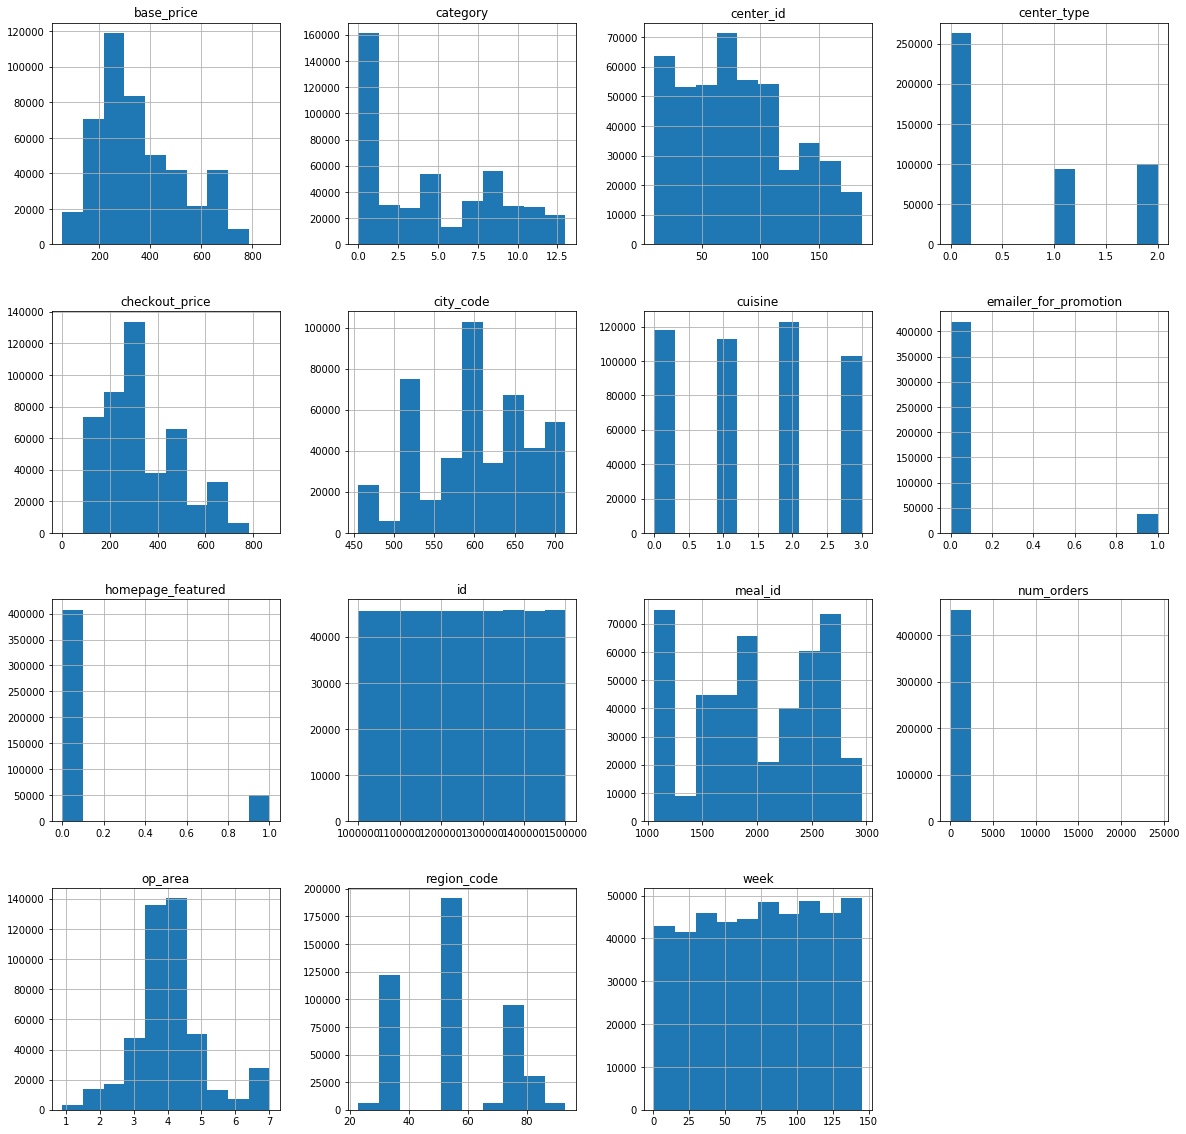

In [72]:
data.hist(figsize=(20,20))
plt.show()

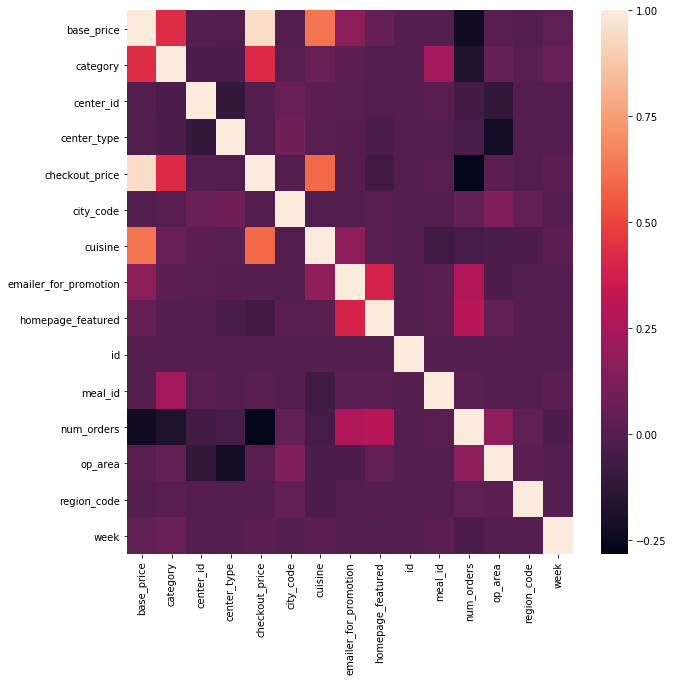

In [73]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr())
plt.show()

# Bar Plot

# Number of orders from different Centers

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(data['center_id'],data['num_orders'])
plt.xticks(rotation = 90)

Here we see that more number of orders are placed from center ids 10,13,43,52 and less for 41,53,55,57,74,91,149

Category has Beverages, Rice Bowl, Starters, Pasta, Sandwich, Biryani, Extras, Pizza, Seafood, Other Snacks, Desert,Salad, Fish, Soup

# Numbers of orders from different Categories

In [ ]:
sns.barplot(data['category'],data['num_orders'])

Cuisine has Thai, Indian, Italian, Continental

# Number of orders from different types of Cuisines

In [ ]:
sns.barplot(data['cuisine'],data['num_orders'])

# Number of Orders from different regions

In [ ]:
sns.barplot(data['region_code'],data['num_orders'])

There are more number of orders from 71,56,85 regions and less orders from region 35.

# Number of orders from different areas

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(data['op_area'],data['num_orders'])

# Cat Plot

In [ ]:
sns.catplot(x="meal_id", y="num_orders", kind="bar", data=data, aspect=4)

More orders have been placed for meal id 2290, 1885,1754,1993,2707,2826....

In [ ]:
sns.catplot(x="city_code", y="num_orders", kind="bar", data=data, aspect =4)

# Joint Plot

In [ ]:
sns.jointplot(x='checkout_price',y='num_orders',data = data)

In [ ]:
sns.jointplot(x='op_area',y='num_orders',data = data)

# Number of orders from different Regions

In [ ]:
sns.jointplot(x='region_code',y='num_orders',data = data)


# Number of orders from different cities

In [ ]:
sns.jointplot(x='city_code',y='num_orders',data = data)

# Number of orders from Different Centers

In [ ]:
sns.jointplot(x='center_id',y='num_orders',data = data)

# Line Plot

# Number of orders in a week

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data['week'],data['num_orders'])

# Number of orders from different cities.

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data['city_code'],data['num_orders'])

In [ ]:
print("Total number of centers : ",data['center_id'].nunique())

In [ ]:
print("Total Number of cities: ",data['city_code'].nunique())

In [ ]:
print("Total Number of areas: ",data['op_area'].nunique())

In [ ]:
print("Total Number of regions: ",data['region_code'].nunique())

    77 Centers in 51 Cities, so some city have more than 1 center.
    30 areas and 8 regions in the 77 centers.
    Category has Beverages, Rice Bowl, Starters, Pasta, Sandwich, Biryani, Extras, Pizza, Seafood, Other Snacks, Desert,Salad, Fish, Soup.
    Cuisine has Thai, Indian, Italian, Continental.

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y = data['category'], hue=data['cuisine'], ax=ax)
plt.show()

In [ ]:
meal_base_price = data[['week', 'center_id', 'meal_id', 'base_price']]
meal_base_price = meal_base_price.set_index(['meal_id', 'center_id', 'week'])
meal_base_price = meal_base_price.sort_index()
meal_base_price.head()

In [ ]:
meal_per_center = data[['week', 'center_id', 'meal_id', 'num_orders']]
meal_per_center = meal_per_center.set_index(['meal_id', 'center_id', 'week'])
meal_per_center = meal_per_center.sort_index()
meal_per_center.head()

In [ ]:
meal_across_center = data[['week', 'meal_id', 'num_orders']]
meal_across_center = meal_across_center.set_index(['meal_id', 'week'])
meal_across_center = meal_across_center.sort_index()
meal_across_center.head()

# Training and Testing the Data

In [ ]:
X = data.loc[:,['base_price', 'category', 'center_id', 'center_type', 'checkout_price','city_code', 'cuisine', 
                'emailer_for_promotion', 'homepage_featured','id', 'meal_id','op_area', 'region_code', 'week']] 
X.head()

In [ ]:
Y = data.loc[:,["num_orders"]]
Y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
X_train.head(3)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
print("a0 = ",lm.intercept_)
print("Coeff = ",lm.coef_)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

In [ ]:
y_pred

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Multiple Linear Regression

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)

print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(X_test)

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

In [ ]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

# K-Means Clustering

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

In [ ]:
y_pred

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
xg_reg

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
print(preds)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
r2 = r2_score(y_test,preds)
print(r2)

# Time Series

In [76]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

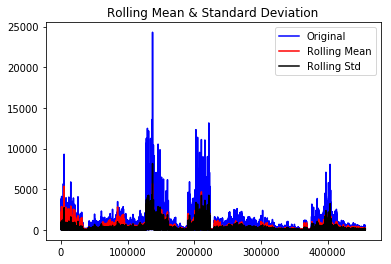

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(data.num_orders)